In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Set Working Directory
%cd /content/drive/MyDrive/CSE6242

In [ ]:
import pandas as pd

In [13]:
updated_atlanta_restaurant_reviews = pd.read_csv('updated_filtered_atlanta_restaurant_reviews.csv')

In [236]:
df_1121 = pd.read_csv('complete_file_merged_filtered_adjusted_1125.csv')

In [237]:
df_1121['normalized_weighted_rating'] = df_1121['normalized_weighted_rating'].round(0)

In [125]:
df_removal = pd.read_csv('complete_file_merged_filtered.csv')

In [126]:
df_removal['avg_rating'] = df_removal['avg_rating'].round(1)

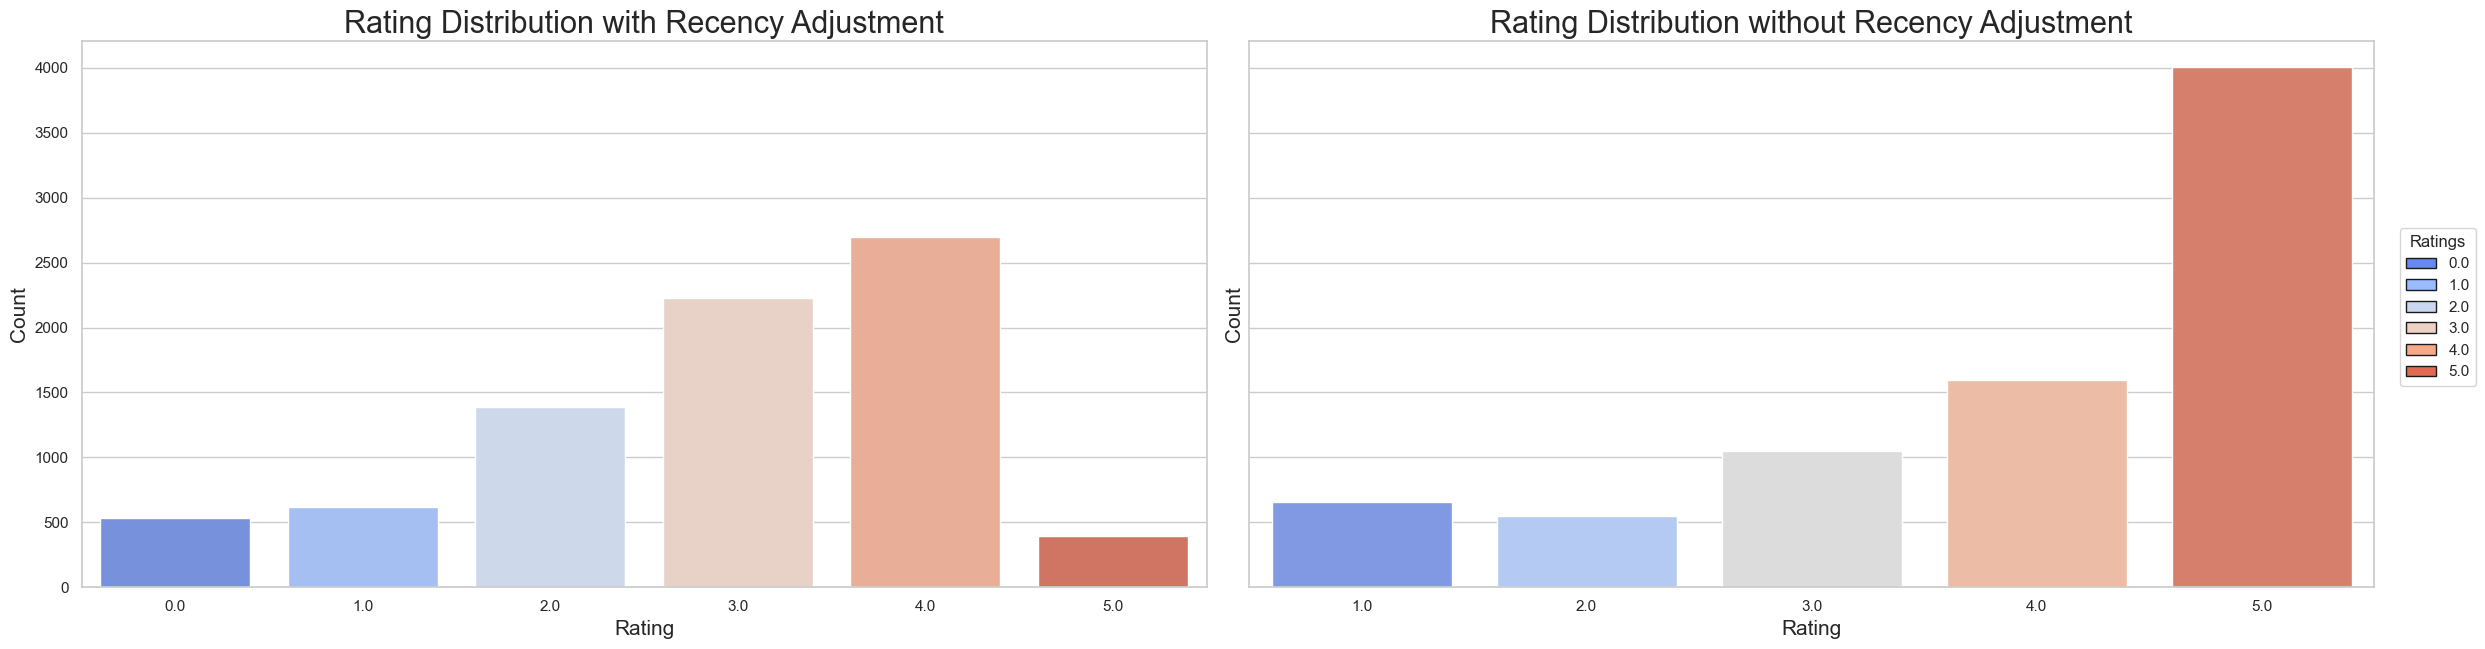

In [274]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
df_with_adjustment = df_1121[df_1121['gmap_id'] == target_gmap_id]
df_without_adjustment = df_1121[df_1121['gmap_id'] == target_gmap_id]

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 7), sharey=True)

# Plot with normalized weighted rating
sns.countplot(x='normalized_weighted_rating', data=df_with_adjustment, palette='coolwarm', ax=ax1)
ax1.set_title('Rating Distribution with Recency Adjustment',fontsize = 22)
ax1.set_xlabel('Rating',fontsize = 15)
ax1.set_ylabel('Count',fontsize = 15)

# Plot with raw rating
sns.countplot(x='rating', data=df_without_adjustment, palette='coolwarm', ax=ax2)
ax2.set_title('Rating Distribution without Recency Adjustment', fontsize = 22)
ax2.set_xlabel('Rating',fontsize = 15)
ax2.set_ylabel('Count',fontsize = 15)

# Create custom handles for the legend
handles = [plt.Rectangle((0,0),1,1, color=c, ec="k") for c in sns.color_palette('coolwarm', 6)]
labels= ["0.0", "1.0", "2.0", "3.0", "4.0", "5.0"]

# Add a legend outside of the subplots
fig.legend(handles, labels, title='Ratings', , bbox_to_anchor=(1, 0.5))

# Adjust layout to make space for the title and the legend
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Add a main title
# fig.suptitle('Rating Distribution Comparison', fontsize=16, y=1.05)

plt.show()


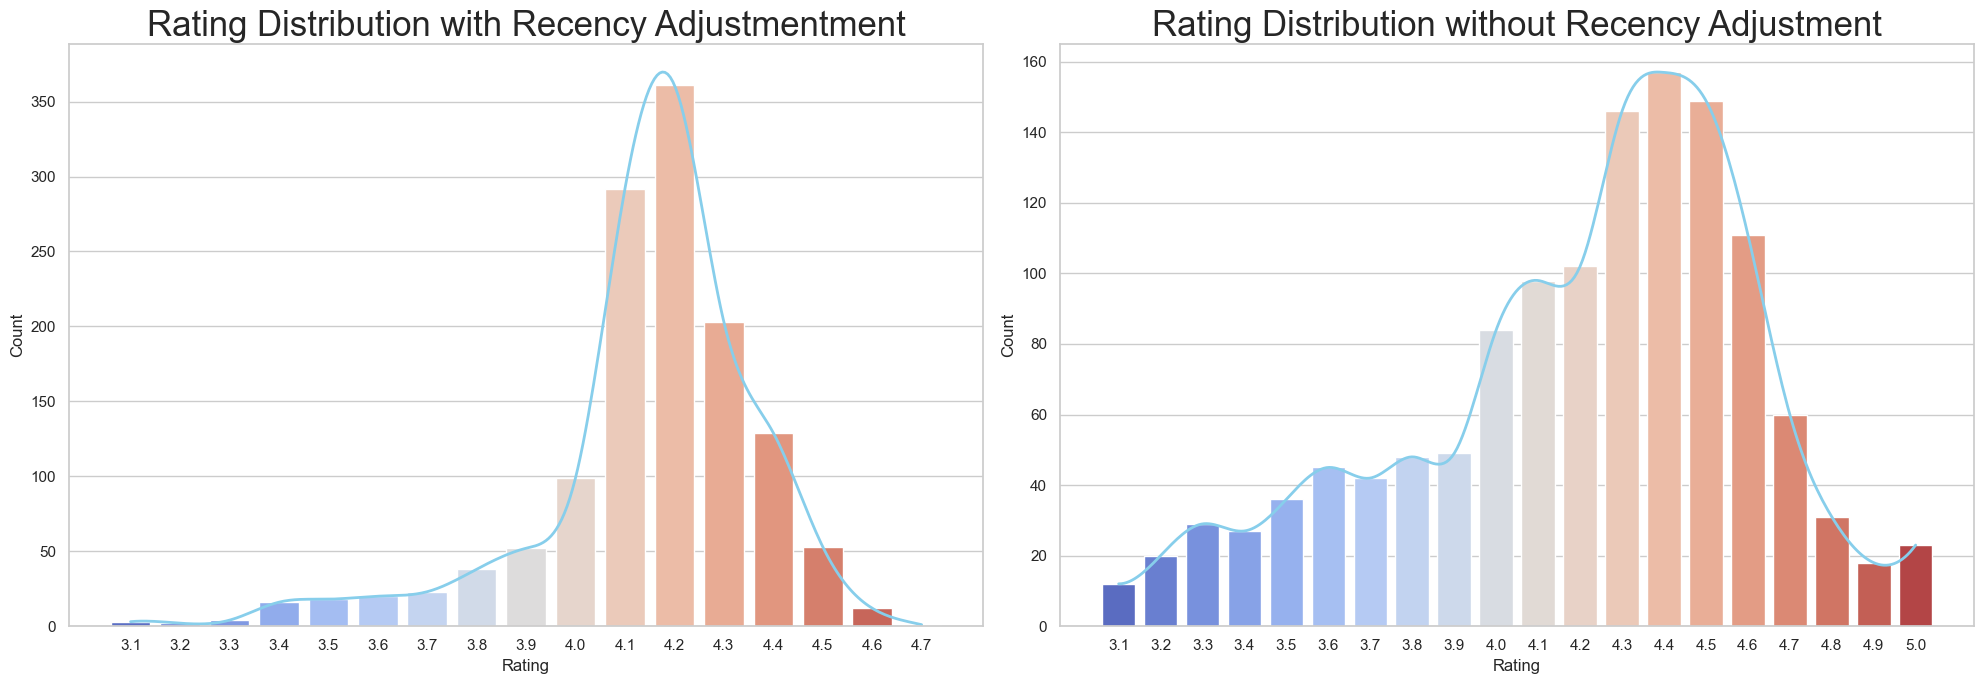

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import interp1d

# Prepare the data
unique_ratings_with_adjustment = df_1121.drop_duplicates(subset='gmap_id')
unique_ratings_without_adjustment = df_removal[df_removal['avg_rating'] > 3.0].drop_duplicates(subset='gmap_id')

# Set up the matplotlib figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 row, 2 columns

# Plot with recency adjustment
sns.countplot(data=unique_ratings_with_adjustment, x='updated_weighted_avg_rating', palette='coolwarm', ax=ax1)
ax1.set_title('Rating Distribution with Recency Adjustmentment',fontsize=25)
ax1.set_xlabel('Rating')
ax1.set_ylabel('Count')

# Plot without recency adjustment
sns.countplot(data=unique_ratings_without_adjustment, x='avg_rating', palette='coolwarm', ax=ax2)
ax2.set_title('Rating Distribution without Recency Adjustment', fontsize=25)
ax2.set_xlabel('Rating')
ax2.set_ylabel('Count')

# Interpolation for the first subplot
bar_centers = [p.get_x() + p.get_width() / 2 for p in ax1.patches]
bar_heights = [p.get_height() for p in ax1.patches]
f = interp1d(bar_centers, bar_heights, kind='cubic', bounds_error=False, fill_value="extrapolate")
x_new = np.linspace(min(bar_centers), max(bar_centers), 300)
y_smooth = f(x_new)
ax1.plot(x_new, y_smooth, color='skyblue', linewidth=2)

# Interpolation for the second subplot
bar_centers = [p.get_x() + p.get_width() / 2 for p in ax2.patches]
bar_heights = [p.get_height() for p in ax2.patches]
f = interp1d(bar_centers, bar_heights, kind='cubic', bounds_error=False, fill_value="extrapolate")
x_new = np.linspace(min(bar_centers), max(bar_centers), 300)
y_smooth = f(x_new)
ax2.plot(x_new, y_smooth, color='skyblue', linewidth=2)

# Adjust layout
plt.tight_layout()
plt.show()
